In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [226]:
df=pd.read_csv(r"C:\Users\Nomitech\Desktop\Machine learning\insurance.csv")

In [227]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [228]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [229]:
##Checking null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [231]:
##Grouping by region to check for any relationship between region and charges
df.groupby("region").mean()
## South East region Has the highest Charges abd body mass index 

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [232]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [233]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [234]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [235]:
df=pd.get_dummies(df,columns=['region'],drop_first=True)

In [236]:
df['sex']=df['sex'].apply(lambda x: 0 if x =='female' else 1)
df['smoker']=df['smoker'].apply(lambda x:0 if x=='no' else 1)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'children'}>],
       [<AxesSubplot:title={'center':'smoker'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

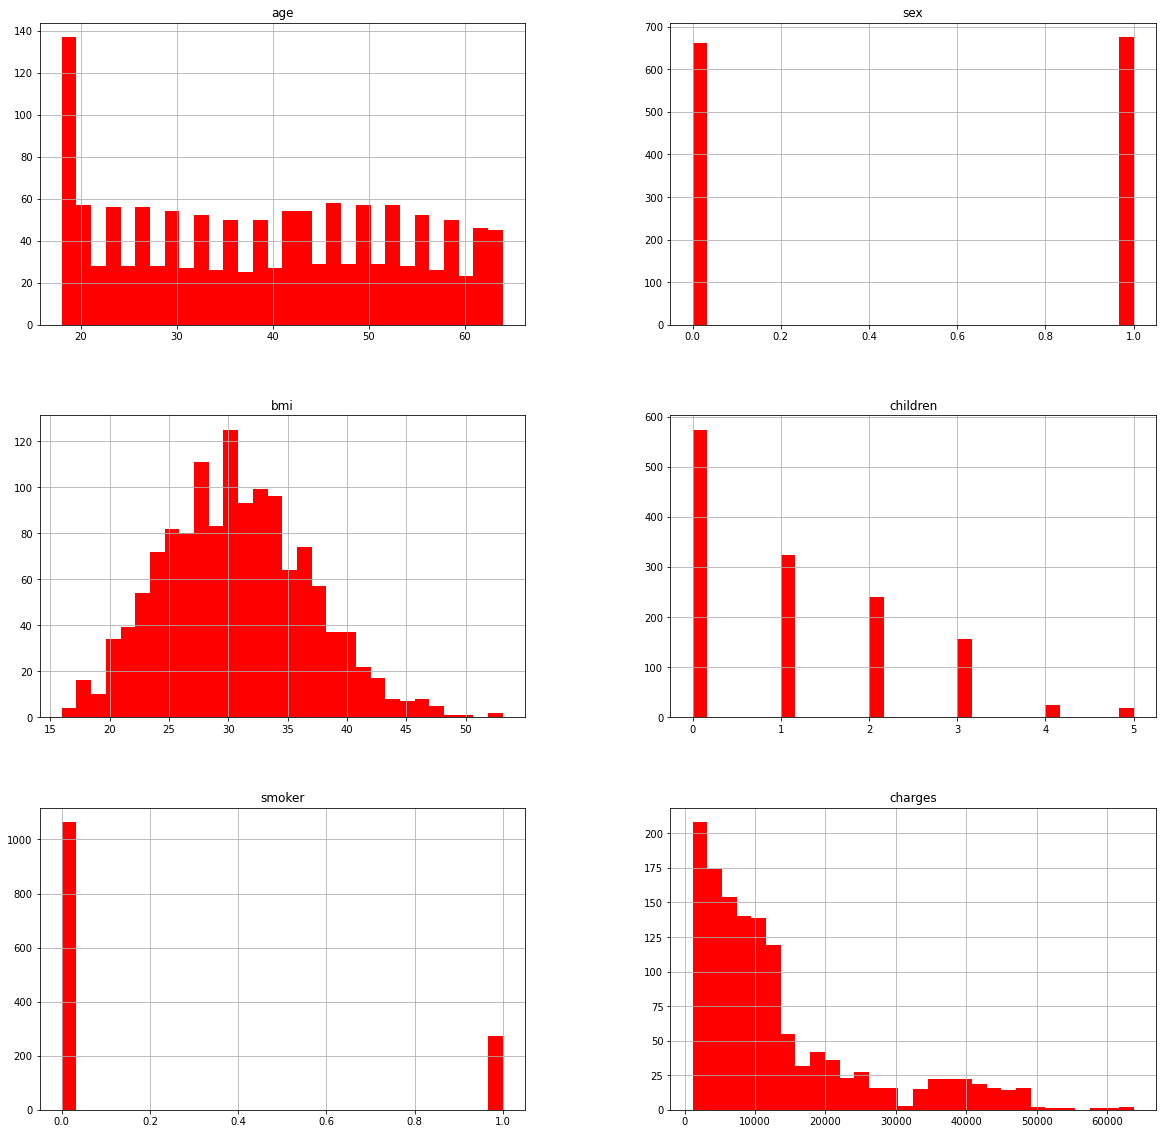

In [237]:
## Check Distribution 
df[['age','sex','bmi','children','smoker','charges']].hist(bins=30,figsize=(20,20),color='r')


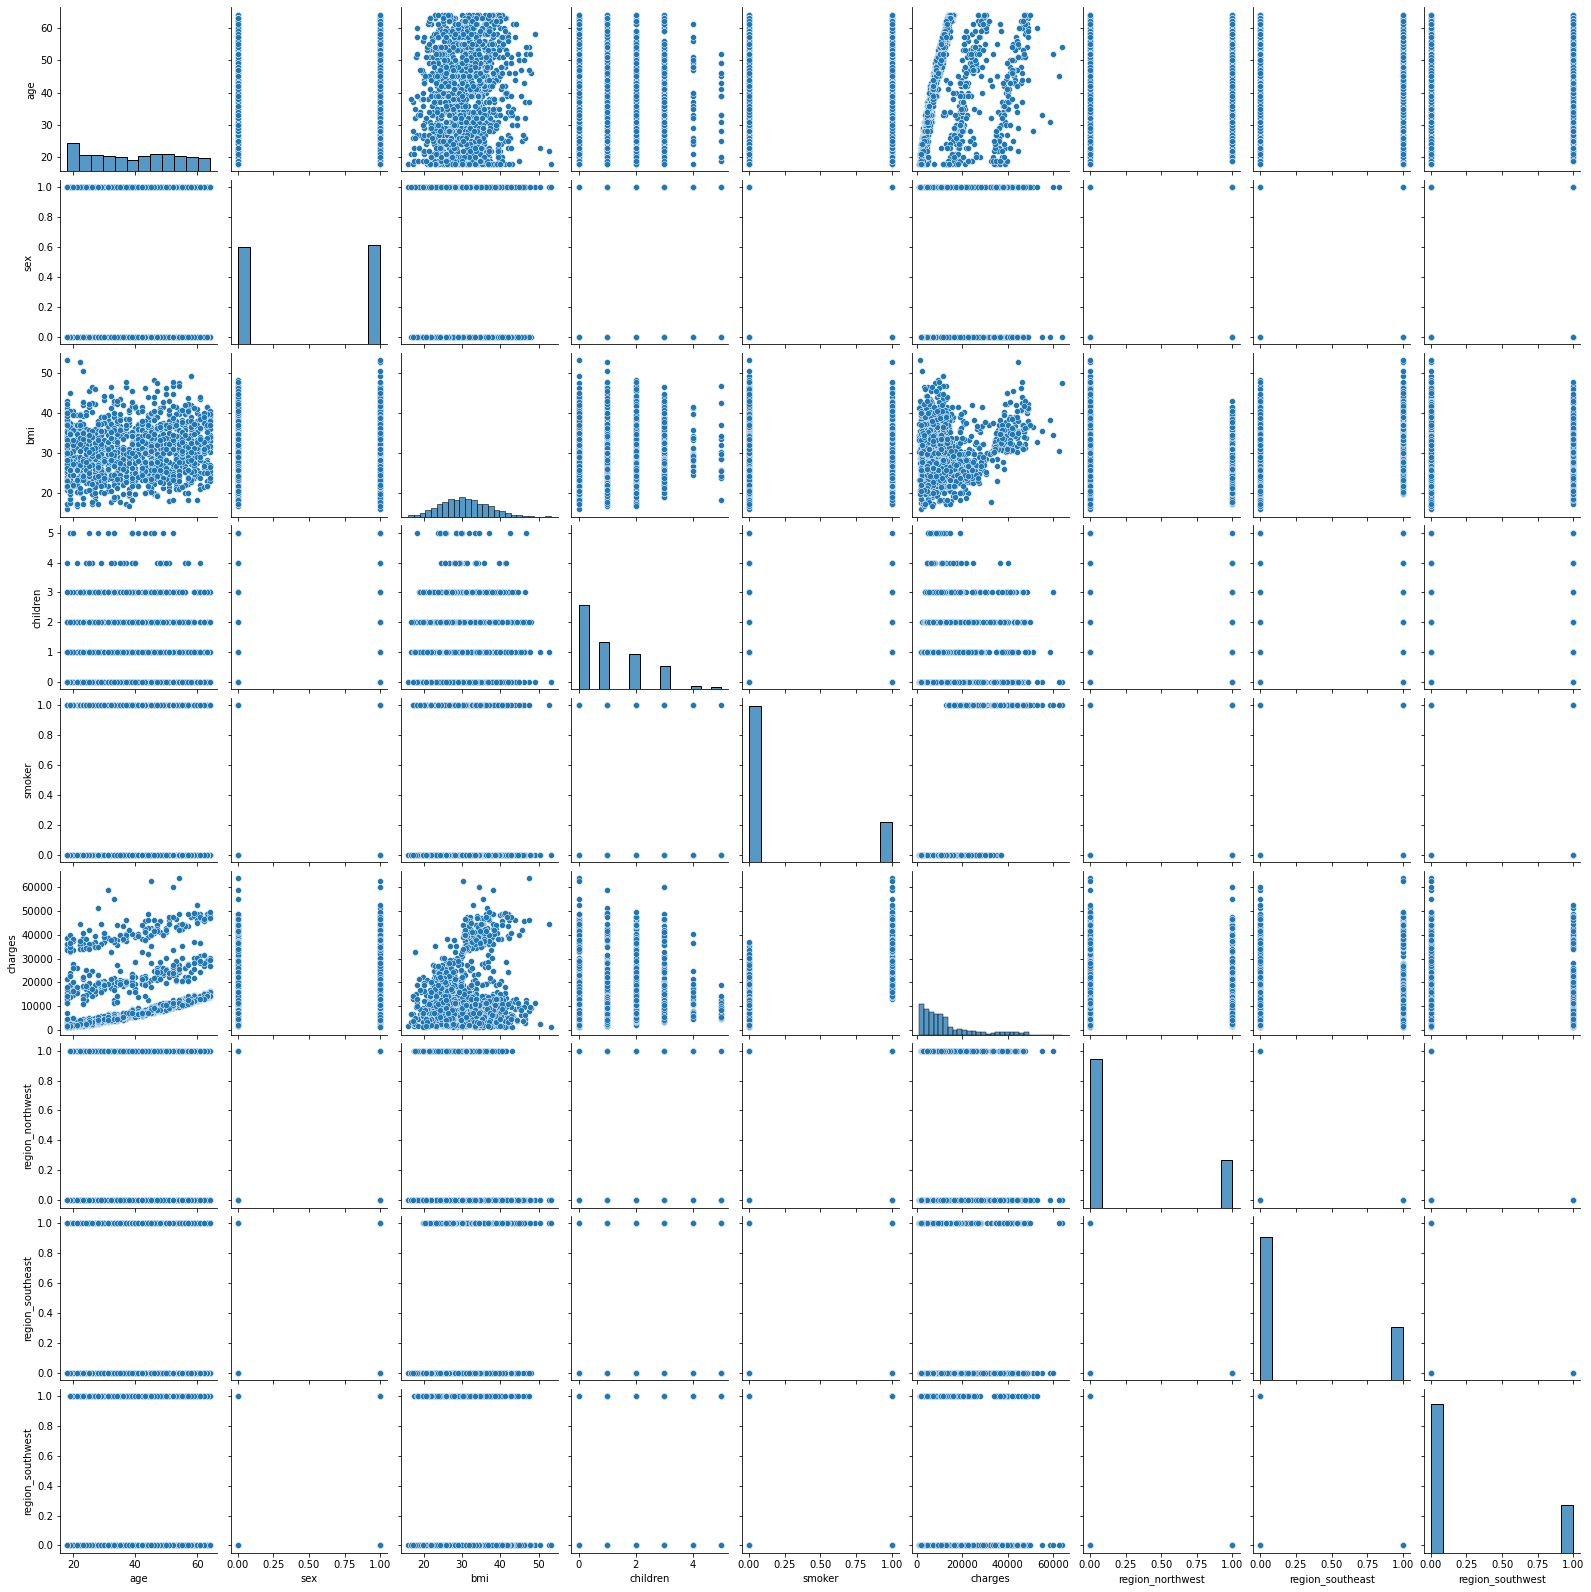

In [238]:
sns.pairplot(df)

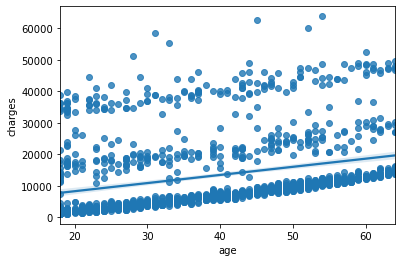

In [239]:
sns.regplot(x='age',y='charges',data=df)
plt.show()

In [240]:
corr = df.corr()

In [241]:
corr

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000


In [242]:
## creating train and test set

In [243]:
y = df['charges'].values
x = df.drop('charges',axis=1).values

(1338,)

In [244]:

y = y.reshape(-1,1)

In [245]:
x.shape

(1338, 8)

In [246]:
y.shape

(1338, 1)

In [247]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
x = scaler_x.fit_transform(x)
y = scaler_y.fit_transform(y)

In [248]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=72)

In [249]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [250]:
y_predict = regressor.predict(x_test)

In [251]:
y_predict

array([[ 0.54029475],
       [ 0.14537284],
       [ 0.02280557],
       [ 0.10093474],
       [ 0.16466183],
       [ 0.24960019],
       [ 0.1366425 ],
       [ 0.0746256 ],
       [ 0.09881248],
       [ 0.1585408 ],
       [ 0.14119006],
       [ 0.05605173],
       [ 0.21474736],
       [ 0.23000157],
       [ 0.46439203],
       [ 0.17960908],
       [ 0.03872363],
       [ 0.43653607],
       [ 0.40930421],
       [ 0.0956056 ],
       [ 0.48354241],
       [-0.02317814],
       [ 0.4250011 ],
       [ 0.20352564],
       [ 0.23590401],
       [ 0.11145218],
       [ 0.14463164],
       [ 0.21578798],
       [ 0.01695535],
       [ 0.10289027],
       [ 0.03543735],
       [ 0.06347151],
       [ 0.16654497],
       [ 0.23203473],
       [ 0.00431474],
       [ 0.09399052],
       [ 0.00820258],
       [ 0.22551286],
       [ 0.41286297],
       [ 0.14405448],
       [ 0.10652493],
       [ 0.41107744],
       [ 0.15447185],
       [ 0.17609292],
       [ 0.14822444],
       [ 0

In [253]:
## Get the before scaling values
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

In [256]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE=mean_absolute_error(y_test_orig, y_predict_orig)
r2=r2_score(y_test_orig, y_predict_orig)


In [258]:
print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =') 

RMSE = 5898.434 
MSE = 34791523.96296506 
MAE = 3969.7207166874873 
R2 = 0.7377080534751623 
Adjusted R2 =


In [259]:
list(zip(['age', 'sex', 'bmi', 'children', 'smoker', 'northwest',
       'southeast', 'southwest'], regressor.coef_[0])) 

[('age', 0.1924314045280592),
 ('sex', -0.005783685939587411),
 ('bmi', 0.20103440472220618),
 ('children', 0.044946743907786614),
 ('smoker', 0.3803220799494477),
 ('northwest', -0.004269447981040784),
 ('southeast', -0.014722566998762787),
 ('southwest', -0.016828058698571017)]

In [276]:
## Lets Check with most sifnificance features
x = df[['smoker','bmi','age']].values
y = df['charges'].values

In [277]:
x.shape

(1338, 3)

In [278]:
y=y.reshape(-1,1)

In [279]:
## SCaling the numerical data

In [289]:
scaler_x  = MinMaxScaler()
scaler_y = MinMaxScaler()
x = scaler_x.fit_transform(x)
y = scaler_y.fit_transform(y)

In [290]:
## Split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=72)

In [291]:
regressor = LinearRegression()
regressor.fit(x1_train,y1_train)

LinearRegression()

In [292]:
y_predictor = regressor.predict(x_test)

In [293]:
#Get the values before scaling

In [294]:
## Get the before scaling values
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

In [295]:
# Metrics Calculation
#from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE=mean_absolute_error(y_test_orig, y_predict_orig)
r2=r2_score(y_test_orig, y_predict_orig)

In [296]:
print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =') 

RMSE = 0.094 
MSE = 0.008864440882909212 
MAE = 0.06336492155457164 
R2 = 0.7377080534751623 
Adjusted R2 =
